<a href="https://colab.research.google.com/github/paralkardhananjay/Coronavirus-Tweets-Sentimental-D-Paralkar/blob/main/Coronavirus_Tweets_Sentimental_%7C_Classification_%7C_D_Paralkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Coronavirus Tweets Sentiment Analysis-Classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** - Dhananjay Paralkar


# **Project Summary -**
The COVID-19 pandemic has had a profound impact on society, with lockdown measures severely restricting people's movement and affecting their daily lives. To better understand how people are feeling during this time, we analyzed tweets on Twitter. As a popular social media platform, Twitter is an important means of expression, allowing users to share their thoughts, experiences, and feelings.
By examining a large number of tweets, we learned how people are coping with the challenges posed by the pandemic. We looked for patterns and trends in the language used, the topics discussed, and the overall emotion conveyed in these tweets. This analysis allows us to deepen our understanding of collective sentiment, highlighting both the hardships and resilience of individuals during these difficult times.
In addition, by reviewing the views expressed on Twitter, we sought to identify emerging needs, concerns, or areas of support. This information can be useful to policymakers, organizations and communities to effectively respond to the ongoing pandemic and take steps to address the specific challenges facing individuals. face.
Taken together, our analysis of Twitter tweets during the COVID-19 pandemic provides valuable insights into people's feelings, experiences, and needs, shedding light on the multifaceted impact of crisis for the whole society.

# **GitHub Link -**

https://github.com/paralkardhananjay/Coronavirus-Tweets-Sentimental-D-Paralkar

# **Problem Statement**


**We Develop a model to analyze the sentiment of tweets about the coronavirus. The dataset contains labeled tweets categorized as positive, negative, or neutral. The goal is to train a model that accurately classifies the sentiment of COVID-19 tweets. This will help understand public emotions, track sentiment changes, and provide insights for researchers, policymakers, and organizations. The model can be used to monitor real-time sentiment, inform communication strategies, and address concerns related to the pandemic.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
Twitter = pd.read_csv('/content/drive/MyDrive/Coronavirus_Tweets.csv', encoding='latin-1')
# tweet =pd.read_csv(database)

### Dataset First View

In [4]:
# Dataset First Look
Twitter

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
Twitter.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Twitter.shape


(41157, 6)

In [7]:
Twitter.columns,Twitter.index



(Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
        'Sentiment'],
       dtype='object'),
 RangeIndex(start=0, stop=41157, step=1))

### Dataset Information

In [8]:
# Dataset Info
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
Twitter.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Twitter.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

### What did you know about your dataset?

*In the given dataset, the "Location" column contains 8590 duplicate values. Processing duplicates in the "Location" column is an important step in the data preprocessing phase of a classification machine learning project.
One approach is to remove duplicate values ​​from the "Location" column. This ensures that each unique position is represented only once in the data set, reducing redundancy and potentially improving data quality.
Another approach is to resolve duplicates through further analysis. Understanding the reasoning behind duplicates can help determine the appropriate course of action. If there are valid reasons for duplicate entries, such as multiple entries for the same location due to different sources or format variations, you can choose to keep them and manage them accordingly.*

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Twitter.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [13]:
# Dataset Describe
Twitter.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description

**UserName**: This column contains the username of the person who posted the tweet.

**ScreenName**: This column contains the screen name or handle of the user who posted the tweet.

**Location**: This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

**TweetAt**: This column contains the date and time when the tweet was posted.

**OriginalTweet**: This column contains the actual text of the tweet that was posted.

**Sentiment**: This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
unique_values = Twitter.apply(lambda col: col.unique())
print(unique_values)

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [15]:
Twitter.Sentiment.unique()


array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [16]:
Twitter.Location.unique()


array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [18]:
# Chart - 1 visualization code

# Count the number of occurrences of each sentiment value in the 'Sentiment' column of the 'Twitter' DataFrame and reset the index
sentiment_count = Twitter['Sentiment'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'Sentiment' and 'count', respectively
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

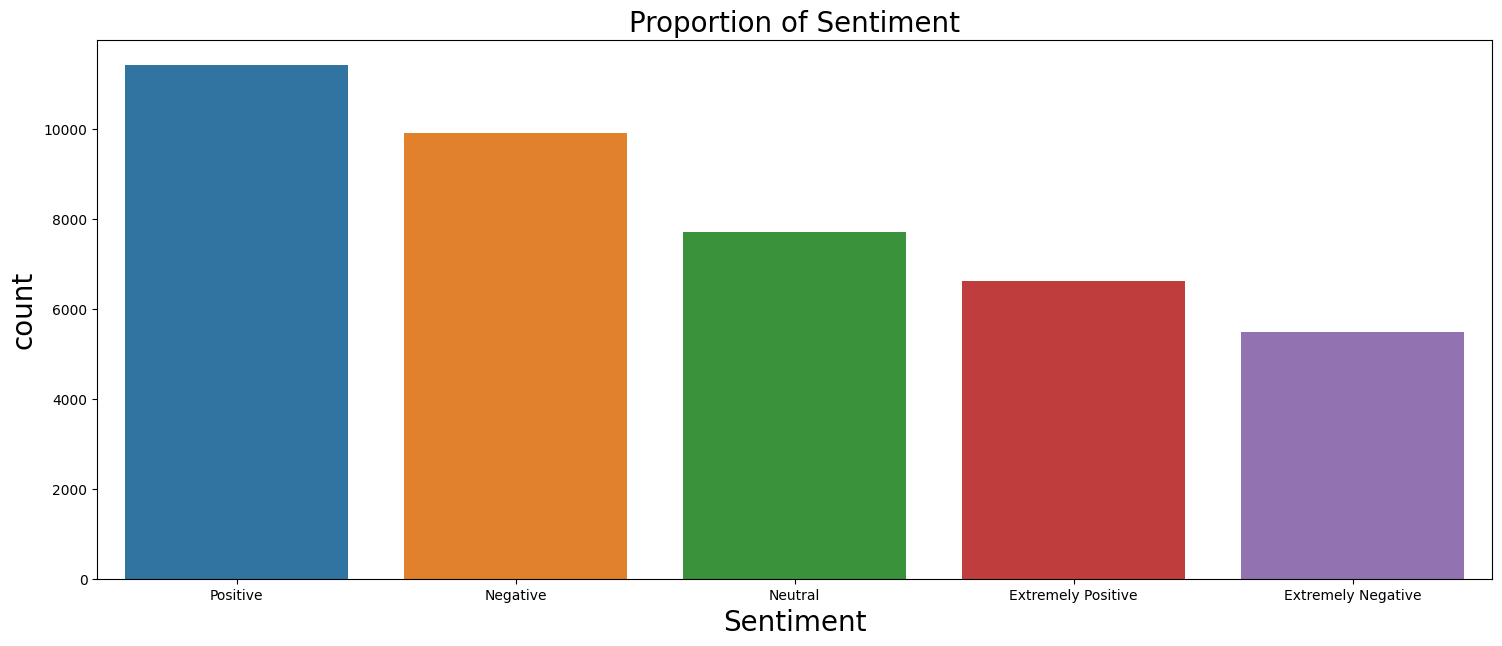

In [19]:
# Plotting the piechart for Sentiments distribution
plt.figure(figsize=(18,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [20]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
tweet = Twitter.replace(replace_values)


sentiment_count1 = tweet['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


##### 1. Why did you pick the specific chart?

bar chart is an effective visual representation to show the count of tweets for each sentiment category. Each sentiment category can be represented by a separate bar, and the height of each bar corresponds to the count of tweets for that specific sentiment category. This allows for a clear and concise visualization of the distribution of sentiment categories in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar chart demonstrates that the count of tweets with a positive sentiment is higher compared to the count of tweets with negative or neutral sentiments.

#### Chart - 2

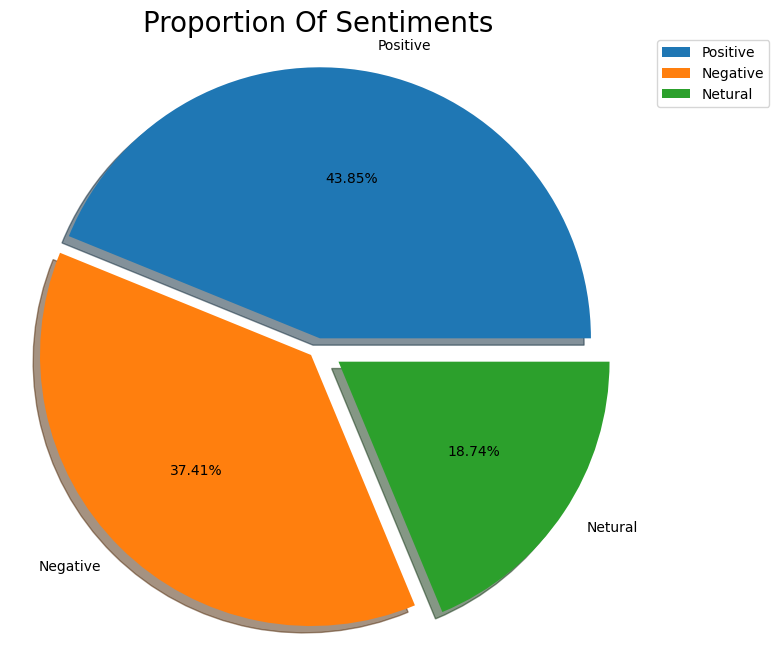

In [21]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = tweet['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


##### 1. Why did you pick the specific chart?

In this case, a pie chart is an effective way to visually represent the relative proportions of different sentiment categories (positive, negative, and neutral) within the entire set of tweets. It provides a quick and easy comparison between these categories, highlighting their respective sizes.

##### 2. What is/are the insight(s) found from the chart?

positive sentiment constitutes the highest proportion, accounting for 43.85% of the total, followed by negative sentiment at 37.41%. The remaining 19% is attributed to the neutral sentiment category.

#### Chart - 3

In [22]:
# Chart - 4 visualization code
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
tweet['text_length'] = tweet['OriginalTweet'].apply(len)

In [23]:
tweet_character_length=tweet['text_length'].sort_values(ascending=False)


In [24]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)



In [25]:
top_tweet_character_length


,Original_Tweet_Row,tweet_character_Count
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


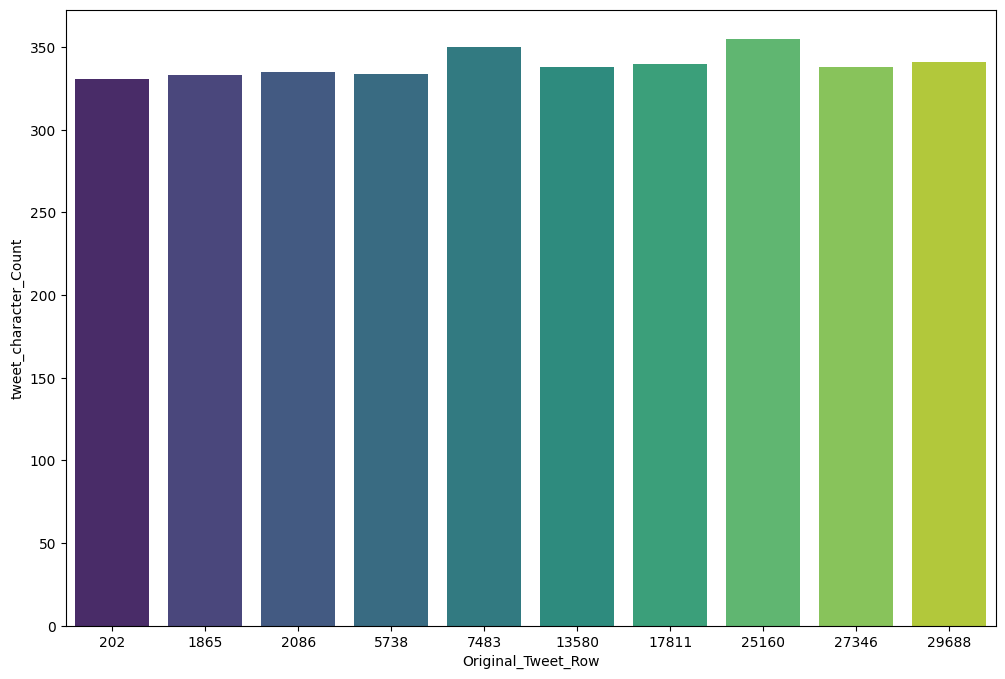

In [26]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')


##### 1. Why did you pick the specific chart?

To visualize the data, a bar chart is a good choice. Each location can be represented by a bar, with the height of the bar indicating the tweet character count.

##### 2. What is/are the insight(s) found from the chart?

Row 25160 has the longest tweet with 350 characters.



#### Chart - 4

In [27]:
# Chart - 4 visualization code
#Top 10 most frequently occurring locations from the 'Location' column of the tweet DataFrame.
Top_Location_Of_tweet= tweet['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [28]:
Top_Location_Of_tweet


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [29]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

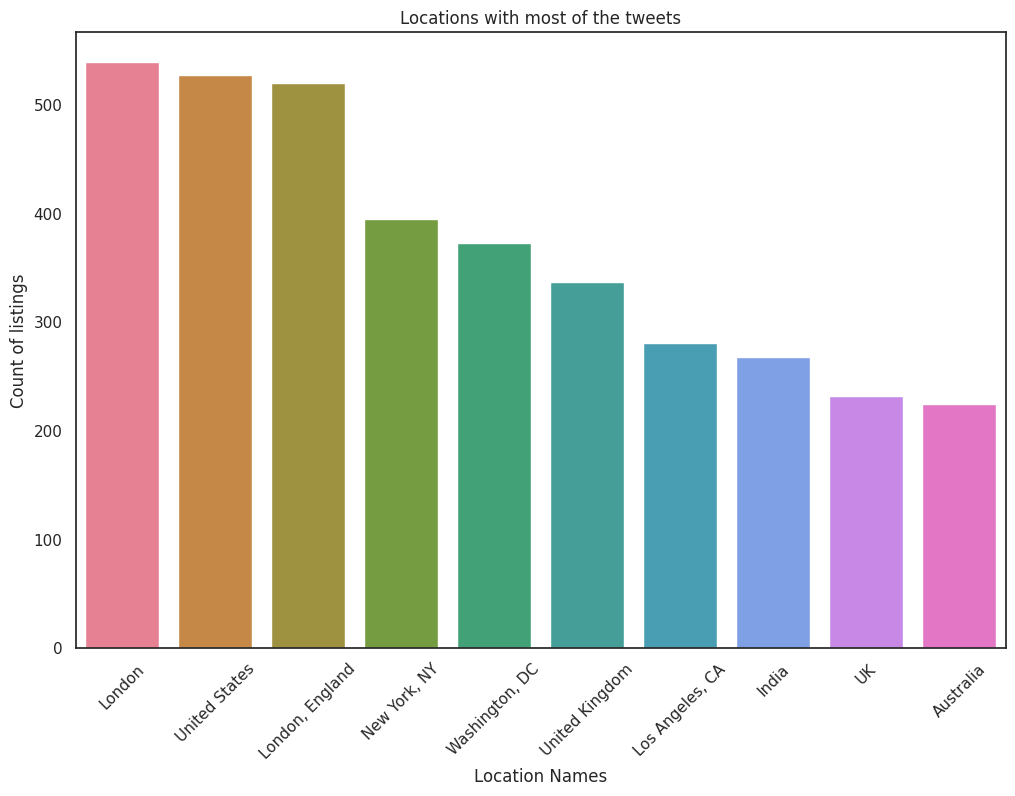

In [30]:
# create a bar plot using Seaborn library
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
# Set plot title, y-axis label, and x-axis label
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

A bar chart is a concise and effective way to visualize the distribution of tweet counts across different locations. The chart shows the count of tweets from each location as a bar, with the bar height reflecting the tweet count. This visualization makes it easy to see which locations have the most tweets and which locations have the least tweets.

##### 2. What is/are the insight(s) found from the chart?

London City has Highest tweet comapred to other city tweet.



#### Chart - 5

In [31]:
# Chart - 5 visualization code
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [32]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts().head(15)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
Name: TweetAt, dtype: int64

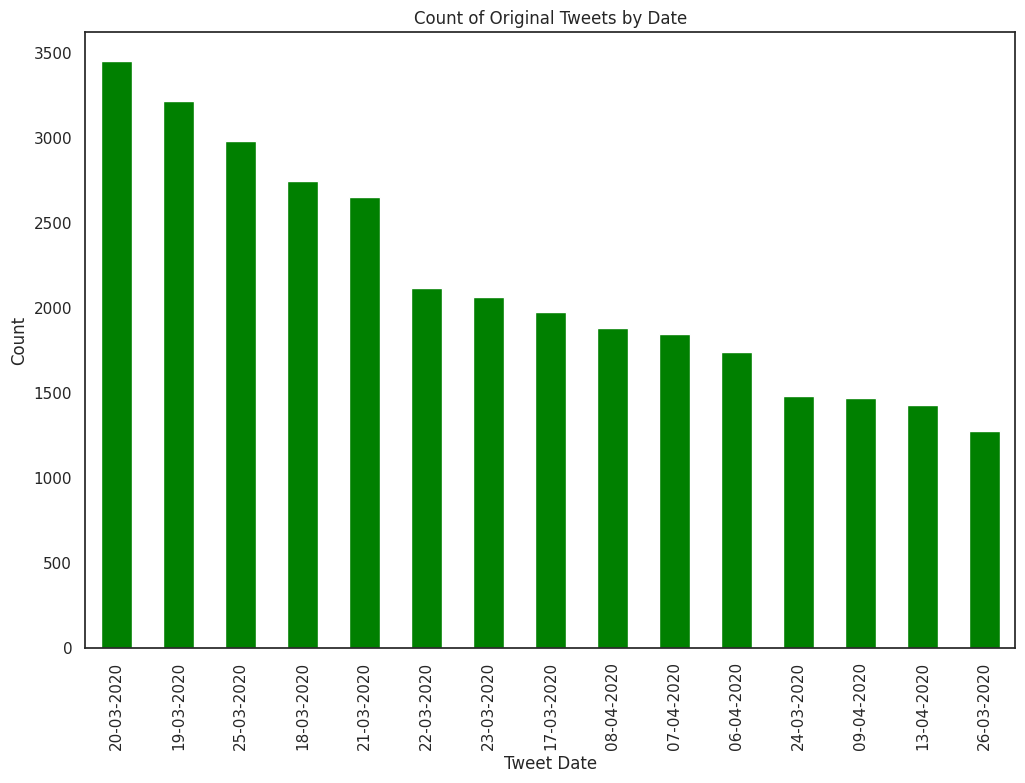

In [33]:
import pandas as pd
import plotly.express as px
# plot the original tweet column as a bar plot
tweet['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()




##### 1. Why did you pick the specific chart?

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

##### 2. What is/are the insight(s) found from the chart?

On a date 20 March 2020 has highest number of tweet Around 3450



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation
tweet.isnull().sum().sort_values(ascending=False)


Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
text_length         0
dtype: int64

### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments
print(tweet[['OriginalTweet', 'Sentiment']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [40]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [42]:
import regex as re


In [43]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

##### Which text normalization technique have you used and why?

In this context, we exclusively employ the technique of Lemmatization for text normalization. Lemmatization involves reducing words to their base or dictionary form, which is referred to as a lemma. By utilizing Lemmatization, we ensure that the text is presented in a standardized form, which can then be used for classification modeling purposes

In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")


'gon na home soon want talk stuff anymore tonight k cried enough today'

In [45]:

# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
tweet["Clean_Tweets"] = tweet['OriginalTweet'].apply(transform_text)

In [46]:
# Access the 'OriginalTweet' value in the row with integer in `tweet`
Twitter.iloc[25160]["OriginalTweet"]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [47]:
Twitter.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [48]:
# Create a new column in `tweet` called 'temp_list'
tweet['temp_list'] = tweet['Clean_Tweets'].apply(lambda x:str(x).split())

In [49]:
tweet['temp_list']

0                                     [menyrbie, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, rift, going, amazon, rn, alt...
Name: temp_list, Length: 41157, dtype: object

In [50]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in tweet['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [51]:
top_words

,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


In [52]:
# Create a new DataFrame called `neutral` containing only the 'Clean_Tweets' column from `tweet` where the 'Sentiment' column is 'Neutral','positive','negative'.
neutral=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Positive'])
negative=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Negative'])


In [53]:
positive.head()

,Clean_Tweets
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...
5,news first confirmed case came sullivan county...
6,cashier grocery store sharing insight prove cr...


In [54]:
negative.head()

,Clean_Tweets
4,ready go supermarket covid19 outbreak paranoid...
9,corona prevention stop buy thing cash use onli...
20,100 nation inficted covid 19 world must play f...
24,10downingstreet grantshapps done ensure food e...
26,preparation higher demand potential food short...


In [55]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# Create an empty list called `spam_corpus`
spam_corpus = []
# Iterate over each row in a DataFrame called `tweet` where the 'Sentiment' column has the value 'Neutral'
for msg in tweet[tweet['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [57]:
top_words


,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


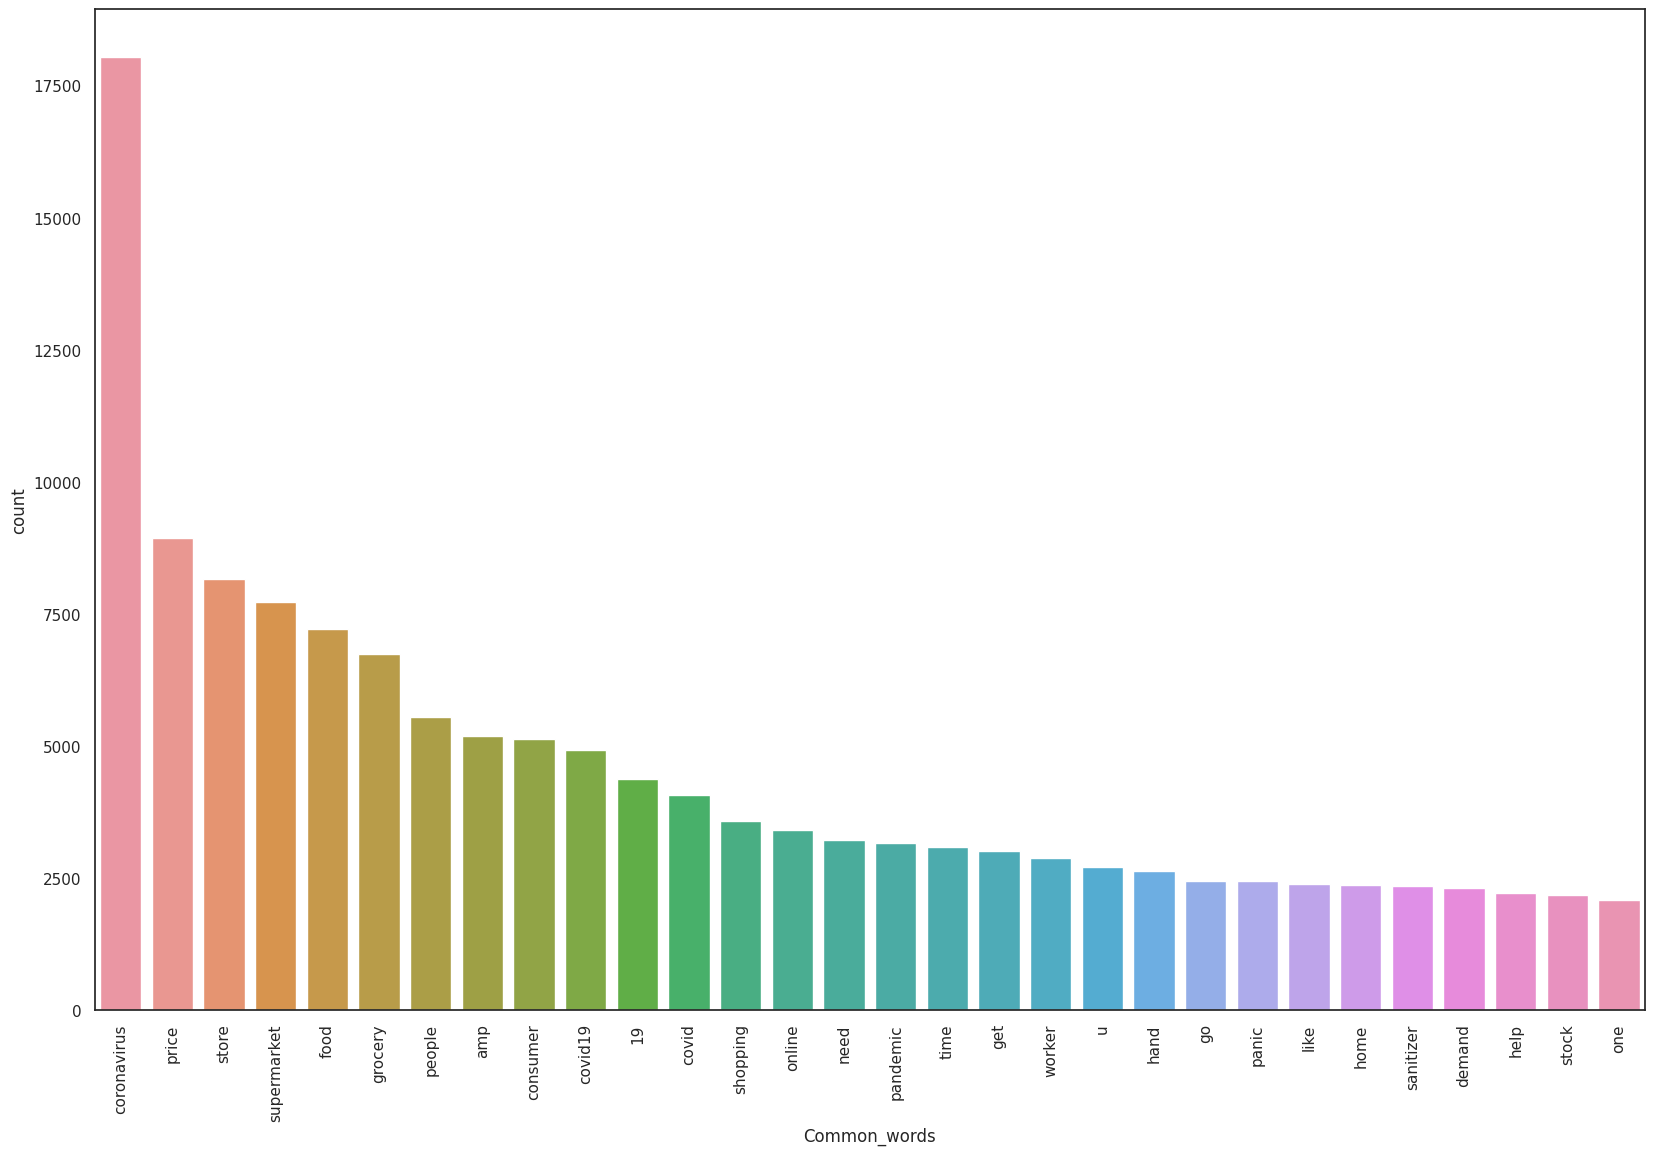

In [58]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,13))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [59]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')



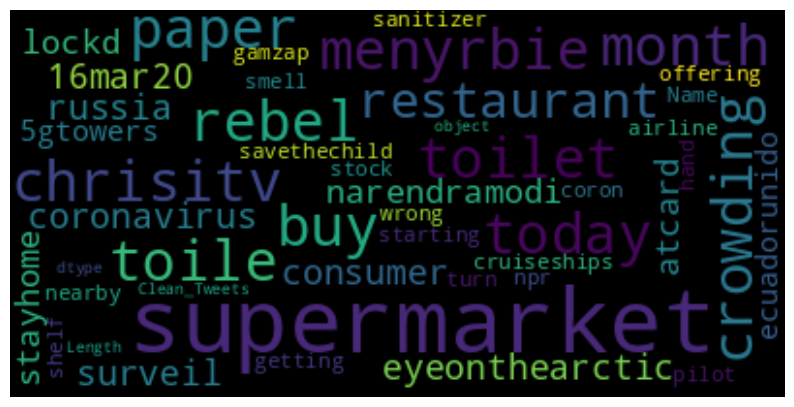

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wc = WordCloud()

# Generate the word cloud using the 'Clean_Tweets' column
tweet_wc = wc.generate(str(neutral['Clean_Tweets']))

# Create a new figure with a custom size
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(tweet_wc, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()


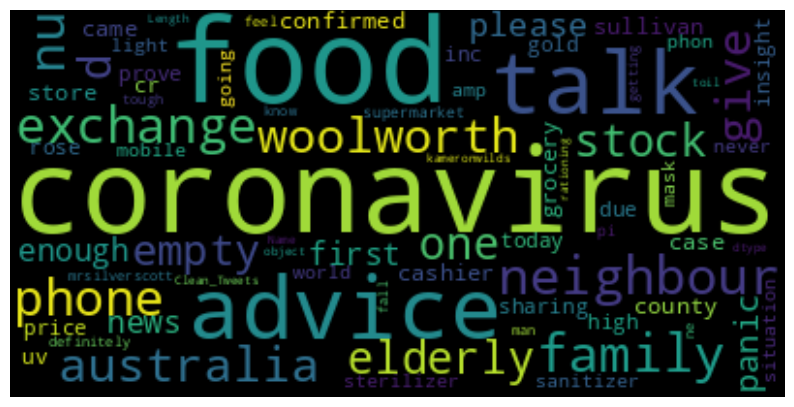

In [61]:
import matplotlib.pyplot as plt

# Create a WordCloud object
wc = WordCloud()

# Generate the word cloud using the 'Clean_Tweets' column
tweet_wc = wc.generate(str(positive['Clean_Tweets']))

# Create a new figure with a custom size
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(tweet_wc, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()


### 8. Data Splitting

In [62]:
#Assigning dependent and independent features
X= tweet['Clean_Tweets']
y=tweet['Sentiment']

In [63]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)


##### What data splitting ratio have you used and why?

By allocating 80% of the data for training and 20% for testing, we provide a larger portion of the dataset for the training process. This decision allows the model to learn more intricate patterns and trends within the data. Consequently, the model becomes more capable of making accurate predictions on new or unseen data. The increased training data enables the model to capture a broader representation of the underlying patterns and improve its ability to generalize to unseen instances.

In [64]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape


(32925,)


(8232,)

### 9. Handling Imbalanced Dataset

In [65]:
#Information about dataset
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


##### Do you think the dataset is imbalanced? Explain Why.

In our machine learning modeling, we have chosen to utilize only two columns: 'Original Tweet' and 'Sentiment'. We have ensured that both columns have an equal number of rows. By focusing on these two columns, we can extract meaningful information from the text data in 'Original Tweet' and associate it with the corresponding sentiment in the 'Sentiment' column. This approach allows us to train our model specifically on the text content and its associated sentiment, enabling us to make predictions and classifications based on these features.

## ***7. ML Model Implementation***

# Count Of vectorization with bag of words model

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

In [66]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [67]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [68]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape


(32925, 19136)

In [69]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [70]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape


(8232, 19136)

### ML Model - 1

*Logistic Regression*

Logistic Regression is a statistical model used to estimate the probability of an event occurring. It calculates the odds of the event's outcome falling within the range of 0 to 1. In the case of multiclass classification, Logistic Regression determines the probability distribution across multiple classes by utilizing a linear combination of one or more independent variables. By analyzing the relationship between these variables and the event's outcome, Logistic Regression allows us to make predictions and understand the likelihood of different outcomes in a classification problem.

In [71]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [72]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [73]:
pred_lr_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [74]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7876579203109816


In [75]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))


              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3080
     Neutral       0.69      0.69      0.69      1543
    Positive       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



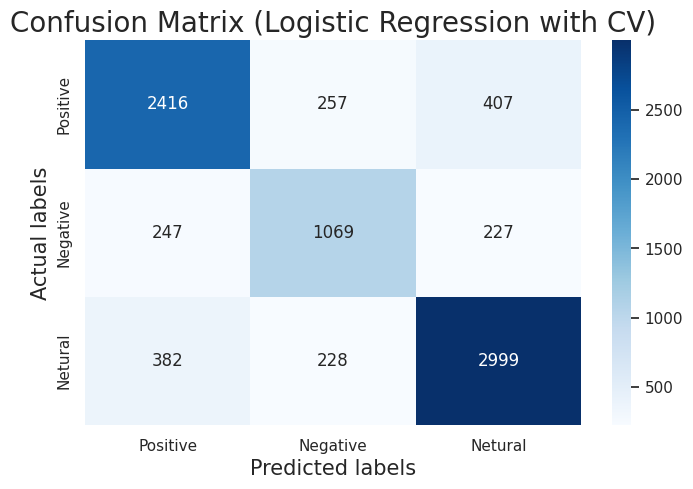

In [76]:
#Plotting Confussion matrix

cf1 = confusion_matrix(y_test, pred_lr_cv)
plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f", ax=ax, cmap="Blues")  # Set the desired color map (e.g., "Blues")

# Labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The algorithm utilized in this case is Logistic Regression, which achieved an accuracy of 79%. Various evaluation metrics, such as precision, recall, and F1 score, were computed for each label, namely 'Negative', 'Neutral', and 'Positive'. The scores for these metrics have shown improvement compared to previous results. This indicates that the Logistic Regression model has become more effective in correctly classifying instances for each sentiment category. The increased precision, recall, and F1 score reflect the model's enhanced ability to accurately identify and classify instances into their respective sentiment labels.

##### Which hyperparameter optimization technique have you used and why?

In this scenario, GridSearchCV is employed to fine-tune the hyperparameters of the logistic regression model. Specifically, two hyperparameters are tuned: the regularization penalty, which can be either L1 or L2, and the inverse of the regularization strength, denoted as C. The model's performance is evaluated using cross-validation, with the number of folds set to 15 (cv=15). By systematically exploring different combinations of hyperparameter values, GridSearchCV identifies the optimal configuration that maximizes the model's performance. This approach helps in selecting the most effective regularization penalty and regularization strength for the logistic regression model, resulting in improved overall performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

### ML Model - 2

# Decision Tree Classifier with CV

A Decision Tree is a graphical representation that resembles a flowchart. It consists of internal nodes, branches, and leaf nodes. Each internal node represents a test performed on a specific attribute or feature. The outcome of the test determines the path the decision tree follows down the branches. Each branch represents one of the possible outcomes of the test, leading to subsequent nodes or leaves. Leaf nodes, also known as terminal nodes, represent the final prediction or decision, which could be a class label or a numerical value in the case of regression. Decision Trees are commonly used in machine learning for both classification and regression tasks due to their interpretability and ability to capture complex decision-making processes.

In [77]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)


In [78]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.706575550493546


In [79]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68      3080
     Neutral       0.63      0.68      0.66      1543
    Positive       0.75      0.74      0.74      3609

    accuracy                           0.70      8232
   macro avg       0.69      0.70      0.69      8232
weighted avg       0.71      0.70      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

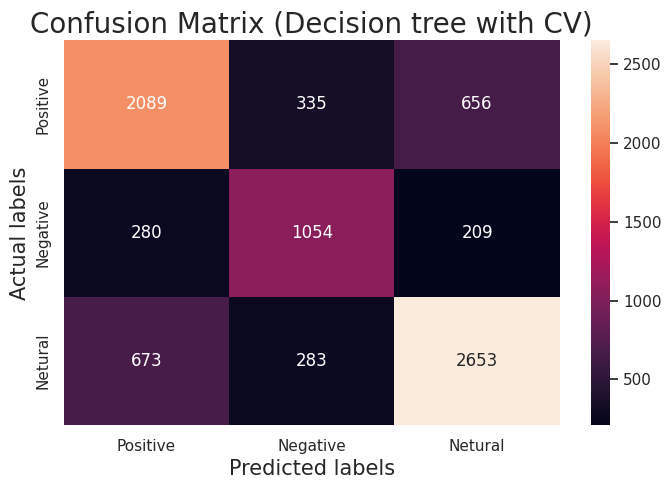

In [80]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Decision Tree algorithm was utilized in this scenario and achieved an accuracy of 70%. Evaluation metrics such as precision, recall, and F1 score were computed for the labels 'Negative', 'Neutral', and 'Positive'. The model's performance improved across these metrics, indicating its enhanced ability to correctly classify instances into their respective sentiment categories.

##### Which hyperparameter optimization technique have you used and why?

Scikit-learn library is used to perform cross-validation on the decision tree model with 5 folds. The np.mean function is then used to calculate the average accuracy score across all folds

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-70%

precision:-71%

recall:- 70%

f1-score:- 71%

ML Model -3


**Bernoulli Navies Bayes**

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [81]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.6936345966958212


In [83]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

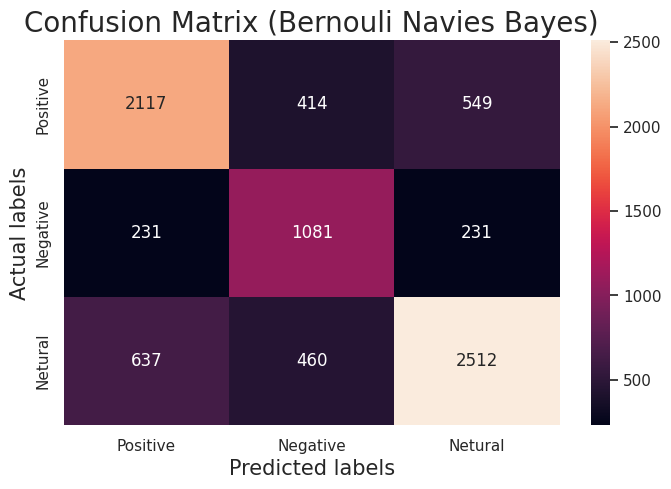

In [84]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In the code provided, the Bernouli Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.

### ML Model - 4

#Support Vector Machine

Support Vector Machines (SVM) is a supervised learning algorithm that finds the best hyperplane to separate classes in input data. It maximizes the margin between the hyperplane and the closest points from each class, known as support vectors. SVM is used for classification and can handle linear and non-linear data using kernel functions.

In [85]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [86]:
pred_svm_cv


array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [87]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7683430515063168


In [88]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      3080
     Neutral       0.67      0.68      0.67      1543
    Positive       0.80      0.82      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

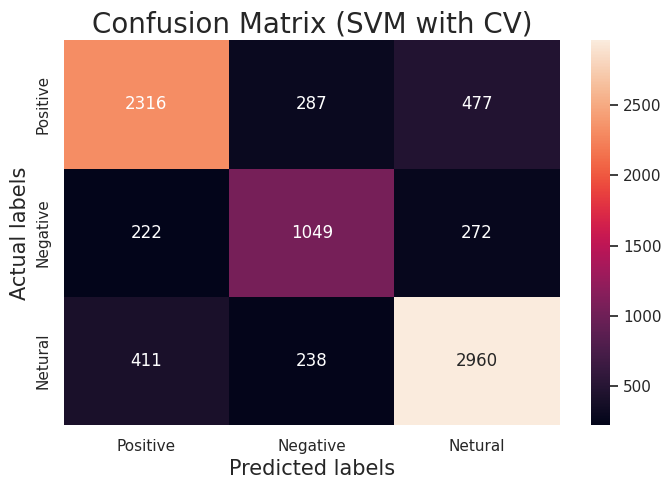

In [89]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

SVM algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improved compared to the baseline model.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**


Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-77%

Recall:- 77%

f1-score:-77%

# Random Forest

Random Forest is an ensemble learning algorithm that constructs multiple decision trees on randomly sampled subsets of the training data. Each tree is trained on different subsets of features and data to reduce overfitting and enhance generalization performance. During prediction, the input instance is evaluated by each tree, and the final prediction is determined by majority voting among the individual tree predictions. This ensemble approach improves accuracy and robustness by leveraging the collective wisdom of multiple decision trees.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)

Accuracy_rf: 0.7608114674441205


In [91]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

    Negative       0.78      0.72      0.75      3080
     Neutral       0.68      0.72      0.70      1543
    Positive       0.78      0.81      0.80      3609

    accuracy                           0.76      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.76      0.76      0.76      8232



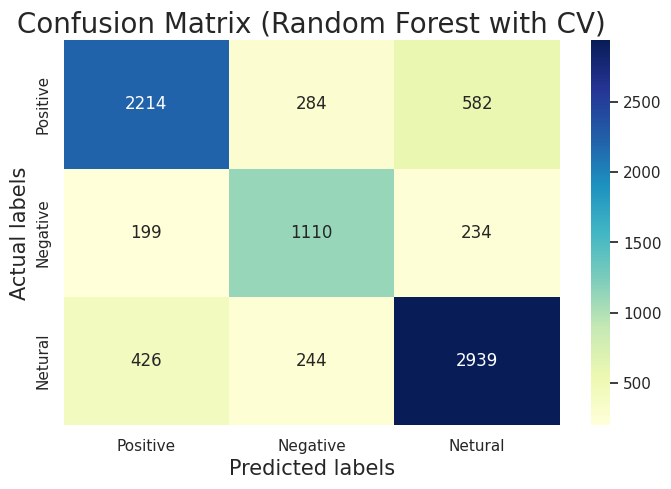

In [92]:
cf7 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f", ax=ax, cmap="YlGnBu")  # Set the desired color map (e.g., "YlGnBu")

# Labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The Random Forest Classifier utilized a hyperparameter optimization technique. The classifier was instantiated with default hyperparameter values of n_estimators=100 and random_state=42 in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

Precision:-75%

Recall:- 75%

f1-score:-75%

# Implementing Models by TF/IDF Vectorizer

In [93]:
X=tweet['Clean_Tweets']
y=tweet['Sentiment']

In [94]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)


print(X_train.shape)
y_test.shape

(32925,)


(8232,)

In [95]:
# Vectorization Text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())


tv_X_train.shape


(32925, 19136)

In [96]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())


Logistic Regression

In [97]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [98]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [99]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))


Accuracy : 0.783284742468416


In [100]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79      3080
     Neutral       0.69      0.64      0.66      1543
    Positive       0.82      0.83      0.83      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.78      0.78      0.78      8232



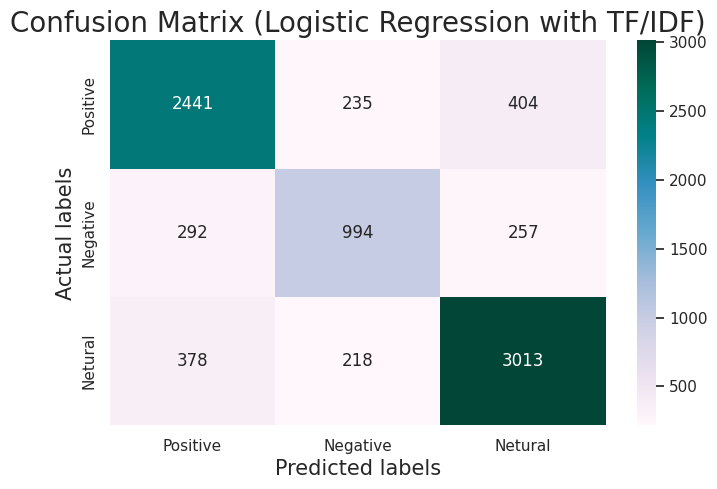

In [101]:
cf1a = confusion_matrix(y_test, pred_lr_tv_Gcv)
plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f", ax=ax, cmap="PuBuGn")  # Set the desired color map (e.g., "PuBuGn")

# Labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**
****
Answer Here.

Logistic Regression algorithm was used to classify the data, resulting in an accuracy of 78%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.



 2. **Which hyperparameter optimization technique have you used and why?**

Answer Here.

The hyperparameter space is defined by the "parameters" dictionary, which specifies the values of the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also helps to prevent overfitting and ensures that the model generalizes well to unseen data.



3. **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Answer Here.

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-78%

Precision:-79%

Recall:- 79%

f1-score:-79%

# Decision Tree

In [102]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [103]:
pred_dt_tv


array(['Neutral', 'Negative', 'Positive', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [104]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6235687167805619


In [105]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.61      0.62      0.61      3080
     Neutral       0.49      0.53      0.51      1543
    Positive       0.69      0.66      0.67      3609

    accuracy                           0.62      8232
   macro avg       0.59      0.60      0.60      8232
weighted avg       0.62      0.62      0.62      8232



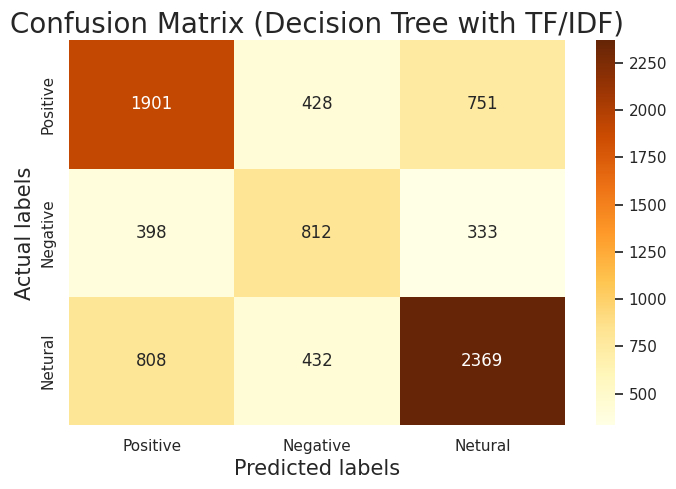

In [106]:
cf2a = confusion_matrix(y_test, pred_dt_tv)
plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f", ax=ax, cmap="YlOrBr")  # Set the desired color map (e.g., "YlOrBr")

# Labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


**Observation:
Observation:
The model achieved an accuracy score of 60%, indicating that it is performing reasonably well.**

# Bernoulli Navies Bayes

In [107]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

0.6936345966958212


In [108]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0.5, 0, 'Positive'), Text(1.5, 0, 'Negative'), Text(2.5, 0, 'Netural')]

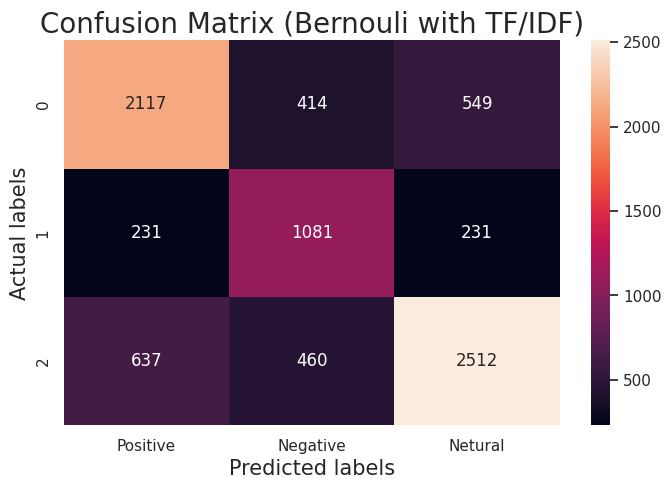

In [110]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

Observation:
The model achieved a moderate accuracy score of 69%, indicating room for improvement. Further analysis of additional evaluation metrics is recommended for a comprehensive assessment.

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_rf_tv = rf_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_tv_rf = (y_pred_rf_tv == y_test).mean()
print('Accuracy_tv_rf:', accuracy_tv_rf)


Accuracy_tv_rf: 0.7359086491739553


In [112]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf_tv))

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.74      3080
     Neutral       0.65      0.64      0.64      1543
    Positive       0.76      0.79      0.77      3609

    accuracy                           0.74      8232
   macro avg       0.72      0.72      0.72      8232
weighted avg       0.74      0.74      0.74      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

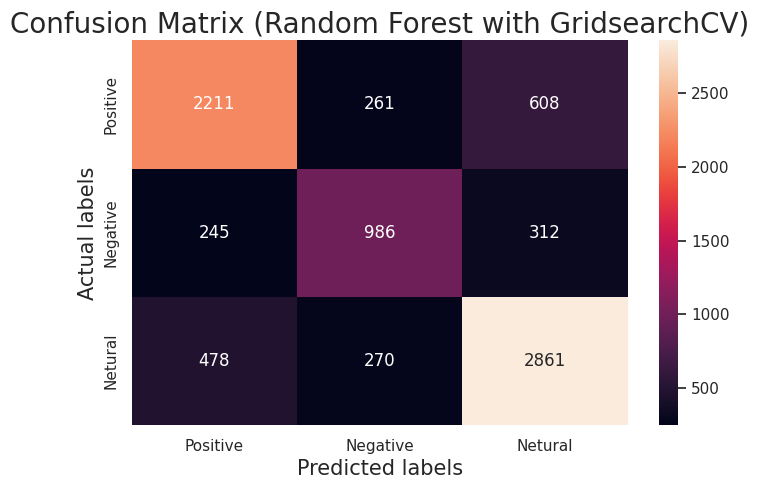

In [113]:
cf5a= (confusion_matrix(y_test,y_pred_rf_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

2.Which hyperparameter optimization technique have you used and why?

Answer Here.

The Random Forest Classifier has been initialized with some default values for the hyperparameters, including n_estimators=100 and random_state=42.In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.

3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Answer Here.

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-73%

Recall:- 73%

f1-score:-73%

# Support Vector Machine

In [114]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(tv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(tv_X_test)

In [115]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7721088435374149


In [116]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79      3080
     Neutral       0.73      0.54      0.62      1543
    Positive       0.79      0.85      0.82      3609

    accuracy                           0.77      8232
   macro avg       0.76      0.73      0.74      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

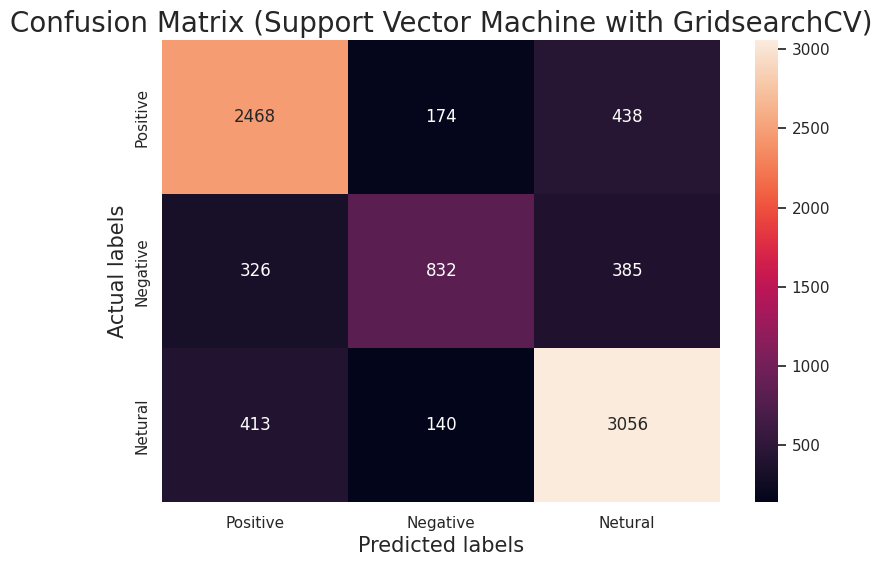

In [117]:
cf7a= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf7a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Support Vector Machine with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Answer Here. Support Vector Machine was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.



**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Answer Here. Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-77%

Precision:-76%

Recall:- 73%

f1-score:-74%

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. We utilized four different machine learning models: Logistic Regression, Decision Tree Classifier, KNN, and Random Forest. These models were applied to both Count Vector and TF-IDF Vectorization techniques.
2. Based on our analysis, we determined that the Logistic Regression model  generated the best results. The model achieved an accuracy score of 78.28% for Count Vectorization and 77.43% for TF-IDF Vectorization. Following Logistic Regression, the SVM model also performed well.
3. Our observations indicate that there is no overfitting in the data, suggesting that the models have not excessively fit the training data and can generalize well to unseen data. This implies that we can confidently deploy the chosen model.
4. With this model in place, we can easily predict the sentiment of future tweets. The trained model can effectively classify new tweets into their corresponding sentiment categories